#### Simple codes for mapping digits to 2D walks

In [1]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
#Get digits -- can construct generators or download (these are strings)
with open('pi.txt') as f: PI = f.read().replace('\n', '').strip()
with open('phi.txt') as f: PHI = f.read().replace('\n', '').strip()
print(len(PI))

100000


As is typical for things like this, you can either track the grid or the points. <br>
Since the dimension is unpredictable,
we track the points, and generate the grid based on the points. <br>
*This does NOT work with other bases (you'll have to convert bases elsewhere)*

In [3]:
#Set up situation
base = 10
thetas = [i*36 for i in range(base)]
number = PI
name = 'Pi'
print(thetas)

[0, 36, 72, 108, 144, 180, 216, 252, 288, 324]


In [4]:
X = []; Y = []
xi = 0; yi = 0
limit = 10000

#Main loop to collect the path
for i in range(limit):
    #convert digit to direction (radians)
    theta = np.deg2rad(thetas[int(number[i])])
    #track path (x_i, y_i)
    xi += cos(theta)
    yi += sin(theta)
    X.append(xi)
    Y.append(yi)

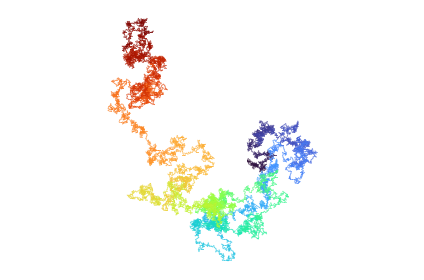

In [5]:
#To plot the path, we simply draw lines from point [x,y] to [x+1,y+1]
colors = cm.turbo(np.linspace(0, 1, len(X))) #color as function of step
for i in range(len(X)-1):
    plt.plot([X[i],X[i+1]],[Y[i],Y[i+1]], alpha=0.5, c=colors[i], linewidth=1.0)
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

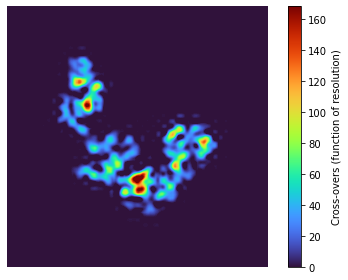

In [6]:
#For the heatmap we just map these x's and y's to our resolution (plus a buffer)
res = 50
buffer = 10

x = np.interp(X, (min(X), max(X)), (buffer, res-buffer))
y = np.interp(Y, (min(Y), max(Y)), (buffer, res-buffer))

#And then construct the grid to this resolution
grid = np.zeros((res,res))
for i in range(limit):
    grid[int(x[i])][int(y[i])] += 1

#Now we can plot the heatmap with imshow or pcolormesh
#imshow axes are flipped, so we rotate to match other plots
im = plt.imshow(np.rot90(grid, axes=(0,1)), cmap='turbo', interpolation='sinc')
plt.colorbar(im, label='Cross-overs (function of resolution)')
plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

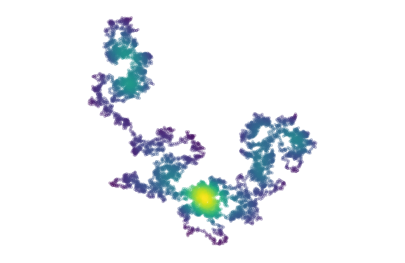

In [7]:
#We can also make a fancy plot by smoothing over the points (note this can take awhile)
from scipy.stats import gaussian_kde

xy = np.vstack([X,Y])
z = gaussian_kde(xy)(xy)
plt.scatter(x, y, c=z, alpha=0.25, s=5)
plt.tight_layout()
plt.axis('equal')
plt.axis('off')
plt.show()
plt.close()